In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

- We can start by looking at the data and understanding it

In [7]:
# Loading the data 
tips_dataset = pd.read_csv("tip.csv")
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# Get the shape of the dataset 
tips_dataset.shape

(244, 7)

- The dataset has 244 rows and 7 columns 

In [11]:
# Check if there is any missing data 
tips_dataset.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

- No missing values in the dataset

In [12]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### Lets now start exploring the data through visualizations. Below questions will be uesed as a guide.

1. How does the distribution of tips change throughout the week? 

2. How does the distribution of total bills vary between weekdays and weekends? 

3. What is the relationship between party size and tip percentage?

4. Is there a difference in tipping behavior between lunch and dinner?

5. How does the tipping behavior vary by day of the week? 

6. What is the distribution of the total bills?

7. How do tips vary with the total bill amount?

8. Do smokers tend to tip differently that non-smokers?

### 1. How does the distribution of tips change throughout the week? 
- In this question, we shall use boxplots to illustrate the distribution of tips throughout the week. See below

In [13]:
tips_dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [20]:
# Checking the days of the week in the dataset 
tips_dataset.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

<Axes: xlabel='day', ylabel='tip'>

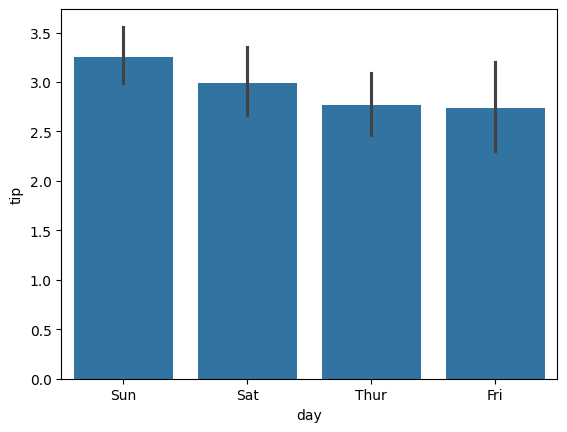

In [18]:
sns.barplot(tips_dataset, x="day", y="tip")

Text(0.5, 0, 'Day of the Week')

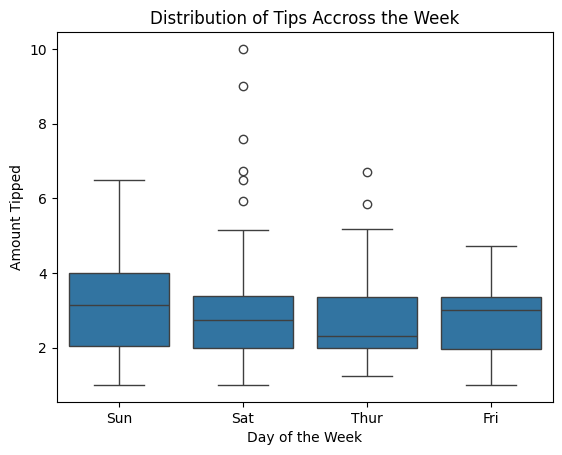

In [24]:
# We can also use boxplots to illustrate the same 
sns.boxplot(tips_dataset, x="day", y="tip") 

plt.title("Distribution of Tips Accross the Week")
plt.ylabel("Amount Tipped")
plt.xlabel("Day of the Week")

- As illustrated by the two plots, most of the tips were received on Sunday and Saturday with weekdays (Thursday and Friday) recording slightly lower tips. Most of the tips were on Saturday as the boxplot illustrates a higher median tip amount plus a wider spread of the amount tipped.